In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def polynomial_basis(data_inputs, degree):
    data_matrix = np.ones((len(data_inputs), 1))
    for i in range(degree + 1):
        if i == 0:
            continue
        else:
            data_matrix = np.c_[data_matrix, data_inputs**i]

    return data_matrix


x = np.array([1, 2, 3])
polynomial_basis(x, 3)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [16]:
test_samples = np.random.randint(low=2, high=6)
test_inputs = np.random.rand(test_samples)
test_degree = np.random.randint(low=2, high=4)

print("input = ", test_inputs)
print("degree = ", test_degree)
print("output = " + "\n", polynomial_basis(test_inputs, test_degree))

input =  [0.19703864 0.64748096 0.14703229]
degree =  3
output = 
 [[1.         0.19703864 0.03882423 0.00764987]
 [1.         0.64748096 0.41923159 0.27144447]
 [1.         0.14703229 0.0216185  0.00317862]]


$$
\Phi^{\top}\left(\mathbf{X}\right)\Phi\left(\mathbf{X}\right) \hat{\mathbf{W}} = \Phi^{\top}\left(\mathbf{X}\right)\mathbf{Y}
$$
Here $\Phi\left(\mathbf{X}\right)$  is the mathematical representation of *data_matrix*
and $\mathbf{Y}$ is the mathematical representation of *data_outputs*, while $\hat{\mathbf{W}}$ is a mathematical representation for coefficients of the polynomial regression.

In [4]:
def polynomial_regression(data_matrix, data_outputs):
    a = data_matrix.T @ data_matrix

    b = data_matrix.T @ data_outputs

    w = np.linalg.solve(a, b)

    return w

 $\mathbf{X} = 
\left\{x^{(1)}, x^{(2)}, \ldots, x^{(s)}\right\}$ for given coefficients $\mathbf{w} = \left(w^{(0)}, w^{(1)},\ldots,w^{(d)}\right)$. The function **prediction_function** takes the arguments _data_matrix_ and _weights_ as inputs and returns a value of the polynomial prediction function evaluated for every $x \in \mathbf{X}$ via
$$
f_{\mathbf{W}}\left(x\right)
= w^{(0)}+w^{(1)}x+\ldots+w^{(d)}x^d,
$$
where _data_matrix_ is a NumPy array representing data matrix $\Phi\left(\mathbf{X}\right)$, _weights_ is a NumPy representation of coefficients vector $\mathbf{w}$. The function should return a vector of the polynomial values $\left(f_{\mathbf{w}}\left(x^{(1)}\right), f_{\mathbf{w}}\left(x^{(2)}, \ldots, f_{\mathbf{w}}\left(x^{(s)}\right)\right)\right)^{\top}$.

In [5]:
def prediction_function(data_matrix, weights):
    predict_output = data_matrix @ weights
    return predict_output

$$
\mathrm{MSE} = \frac{1}{2s} \left\|\Phi\left(\mathbf{X}\right)\mathbf{W} - \mathbf{Y} \right\|^2,
$$
where $\Phi\left(\mathbf{X}\right)$ is a mathematical representation of _data_matrix_, $\mathbf{Y}$ is a mathematical representation of _data_outputs_ and $\mathbf{W}$ is a mathematical representation of _weights_.

In [6]:
def prediction_error(data_matrix, data_outputs, weights):
    MSE = (np.linalg.norm(data_matrix @ weights - data_outputs) ** 2) / (
        2 * len(data_matrix)
    )
    return MSE

### Cross-validation and the optimal degree finder

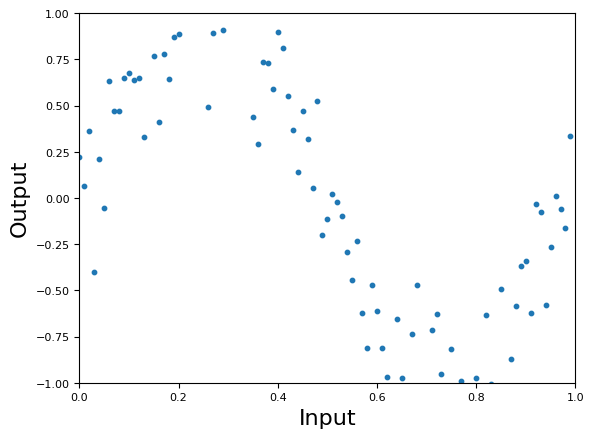

In [7]:
def data_generator(data_inputs, noise_variance):
    return np.sin(2 * np.pi * data_inputs) + (noise_variance) ** (
        1 / 2
    ) * np.random.randn(len(data_inputs))


data_size = 100
noise_variance = 0.05
data_inputs = np.arange(0, 1, 1 / data_size)
data_outputs = data_generator(data_inputs, noise_variance)

plt.scatter(data_inputs, data_outputs, s=10)
plt.axis([0, 1, -1, 1])
plt.xlabel("Input", fontsize=16)
plt.xticks(fontsize=8)
plt.ylabel("Output", fontsize=16)
plt.yticks(fontsize=8)
plt.tight_layout
plt.show()

In [8]:
def data_split(data_matrix, validation_ratio):
    validation_rows = int(len(data_matrix) * (float(validation_ratio)))
    random_validation_index = np.random.choice(
        len(data_matrix), validation_rows, replace=False
    )
    validation_data_set = data_matrix[random_validation_index, :]
    trained_data_set = np.delete(data_matrix, random_validation_index, axis=0)
    return validation_data_set, trained_data_set

In [9]:
def grid_search(objective, grid):
    """
    objective is a function that we want to minimize.
    grid is a list of value that will be put into objective.

    FUNCTION:
    objective

    List:
    grid
    """
    function_result = np.array([])
    for _ in grid:
        function_result = np.append(function_result, objective(_))
    target_min_index = np.argmin(function_result)
    return grid[target_min_index]

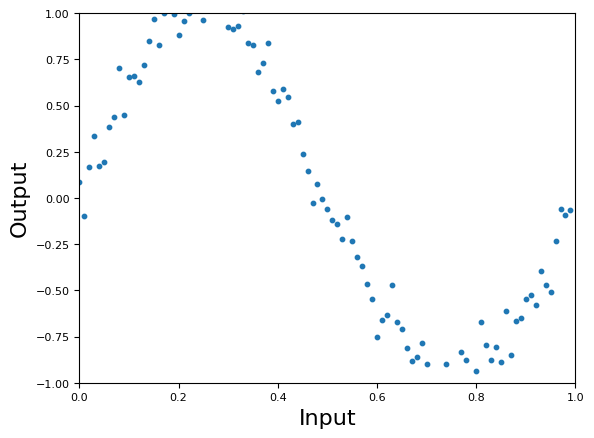

In [10]:
# reset my data
data_size = 100
noise_variance = 0.01
data_inputs = np.arange(0, 1, 1 / data_size)

# artificial noise in data
data_outputs = data_generator(data_inputs, noise_variance)

plt.scatter(data_inputs, data_outputs, s=10)
plt.axis([0, 1, -1, 1])
plt.xlabel("Input", fontsize=16)
plt.xticks(fontsize=8)
plt.ylabel("Output", fontsize=16)
plt.yticks(fontsize=8)
plt.tight_layout
plt.show()

The optimal polynomial has degree 6 with coefficients [-1.53509159e-02  6.27895175e+00  8.84752590e+00 -1.05889747e+02
  1.70398298e+02 -9.65963091e+01  1.69884468e+01].


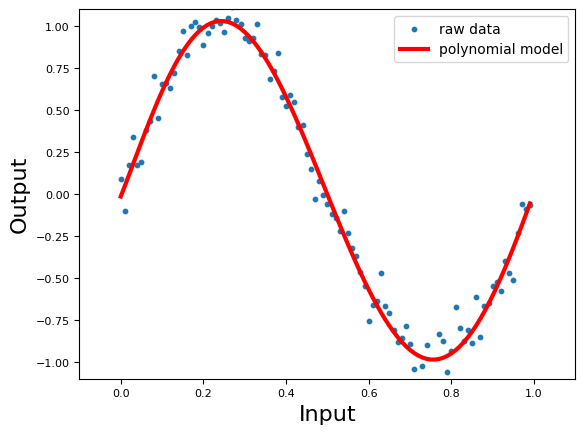

In [11]:
data_matrix = np.c_[data_inputs, data_outputs]
# data_matrix
validation_data, training_data = data_split(data_matrix, 0.2)


def validation_error(d):
    # validation input data
    phi_validation_x = polynomial_basis(validation_data[:, 0], d)
    # validation output data
    valid_y = validation_data[:, 1]
    # trained weight
    poly_trainded_weight = polynomial_regression(
        polynomial_basis(training_data[:, 0], d), training_data[:, 1]
    )
    return prediction_error(phi_validation_x, valid_y, poly_trainded_weight)


degree_grid = np.arange(0, 100, 1)

# use gride search to find the optimal degree for polynomial regression
optimal_degree = grid_search(validation_error, degree_grid)
optimal_weights = polynomial_regression(
    polynomial_basis(training_data[:, :-1], optimal_degree), training_data[:, -1]
)
polynomial_values = prediction_function(
    polynomial_basis(data_inputs, optimal_degree), optimal_weights
)

# setting title starting with X^0
title = ""
title += f"{round(optimal_weights[0],2)}+"
for _ in range(1, optimal_degree):
    if _ == optimal_degree - 1:
        if optimal_weights[_ + 1] < 0:
            title += f"{round(optimal_weights[_],2)}x^{_}-{round(optimal_weights[_+1],2)}x^{_+1}"
        else:
            title += f"{round(optimal_weights[_],2)}x^{_}+{round(optimal_weights[_+1],2)}x^{_+1}"

    else:
        if optimal_weights[_ + 1] < 0:
            title += f"{round(optimal_weights[_],2)}x^{_}"
        else:
            title += f"{round(optimal_weights[_],2)}x^{_}+"

# showing data set
# plt.scatter(validation_data[:, 0], validation_data[:, 1], s=10, label="validation data")
# plt.scatter(training_data[:, 0], training_data[:, 1], s=10, label="training data")
# showing data set
plt.scatter(data_inputs, data_outputs, s=10, label="raw data")


plt.plot(data_inputs, polynomial_values, linewidth=3, c="r", label="polynomial model")
plt.axis([-0.1, 1.1, -1.1, 1.1])
plt.xlabel("Input", fontsize=16)
plt.xticks(fontsize=8)
plt.ylabel("Output", fontsize=16)
plt.yticks(fontsize=8)
if optimal_degree <= 5:
    plt.title(r"$Model \approx {graph_title}$".format(graph_title=title), fontsize=16)
plt.tight_layout
plt.legend()

print(
    f"The optimal polynomial has degree {optimal_degree} with coefficients {optimal_weights}."
)